## Truc huynh

### Material:
- [Filter row and columns in Python Pandas](https://python.plainenglish.io/filtering-rows-and-columns-in-pandas-python-techniques-you-must-know-6cdfc32c614c)
- [Drop multiple columns in Python Pandas](https://pythonexamples.org/pandas-dataframe-delete-column/#5)
- [Check Pandas data type](https://datascientyst.com/check-dtype-column-columns-pandas-dataframe/#:~:text=%20How%20to%20Check%20the%20Dtype%20of%20Column,Check%20if%20column%20is%20numeric%2C%20dateti...%20More%20)
- [Columns Views - Original Data](https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents)
- [Convert value in columns](https://stackoverflow.com/questions/52317459/python-pandas-convert-single-value-in-object-column)

In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import json

## Exploratory Data Analysis (EDA)

1. Decide if feature selection is needed.
    * Do you have hihgly correlated features?
2. Decide if you have non-scalar attributes.
3. What type of supervised learning is this?
    * Binary Classification
    * Multi-class classification?
    * Ordinal classification [Tricky]
        * Do you want to change this into regression or binarize into binary classification?
    * Regression
4. If doing classification
    1. Decide whether you class variable makes sense.
    2. Figure out what your class balance is
5. Histogram the features
    * Good if distribution is highly skewed
6. Vizualize using reduced dimensions
    * PCA, MVD
    * T-SNE

In [34]:
df = pd.read_csv("./data.csv")

In [35]:
df.shape

(2845342, 47)

In [49]:
df.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


## Check Missing values

In [45]:
# Set figure size
plt.rcParams["figure.figsize"]=13,11

sns.set(style='darkgrid')

<AxesSubplot:>

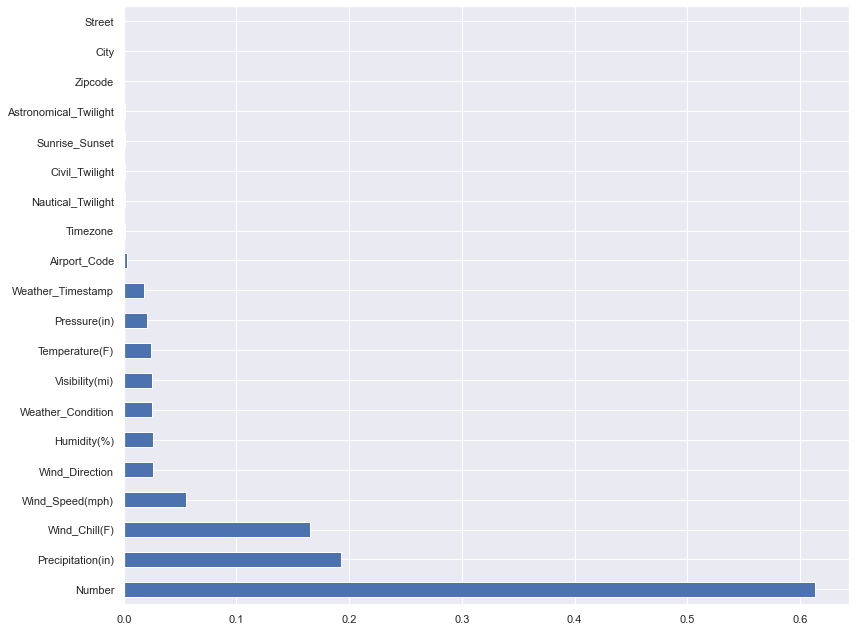

In [46]:
# Check out the missing values in percentage
missing_percentage = df.isna().sum().sort_values(ascending=False)/len(df)

missing_percentage[missing_percentage!=0].plot(kind='barh')


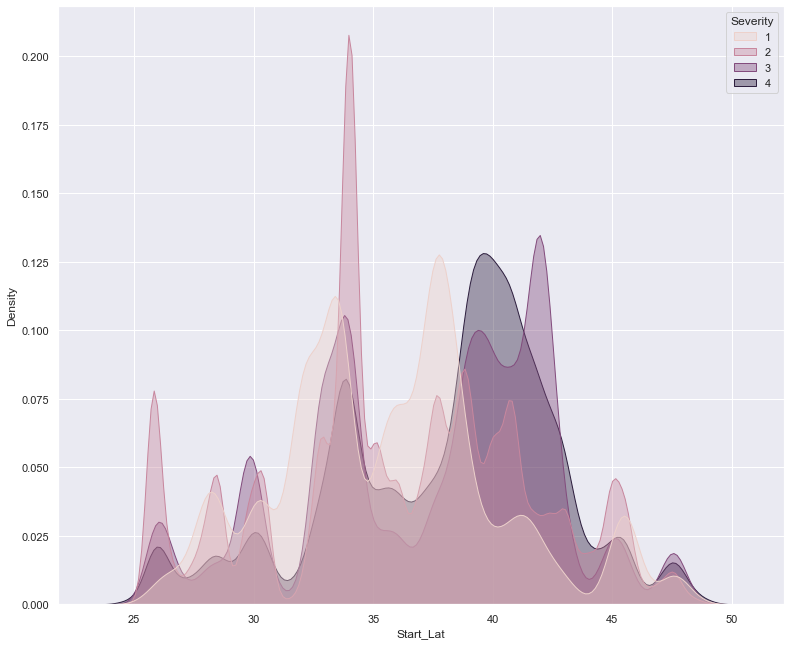

In [47]:
# stacked density plot
sns.kdeplot(data=df, x="Start_Lat", hue="Severity", fill=True, common_norm=False, alpha=0.4)
plt.show()

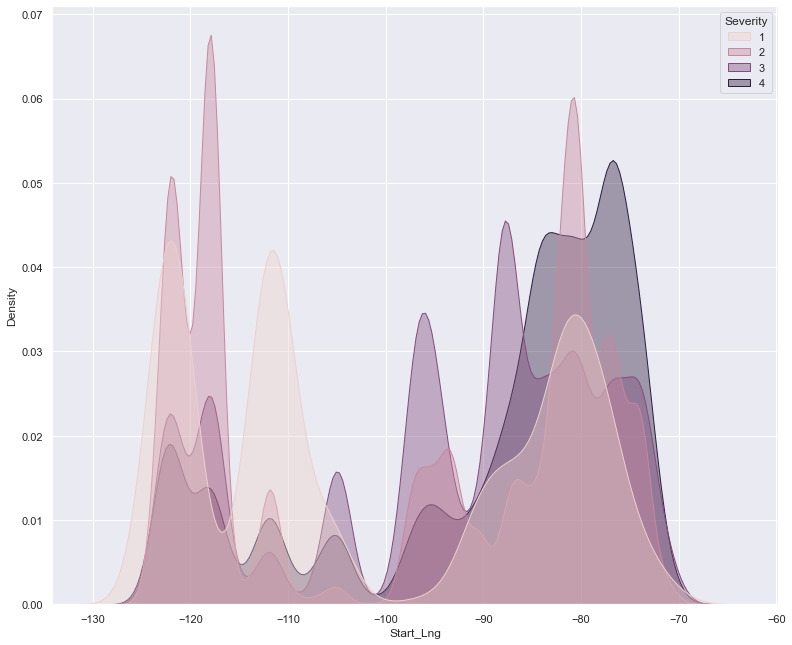

In [48]:
# stacked density plot
sns.kdeplot(data=df, x="Start_Lng", hue="Severity", fill=True, common_norm=False, alpha=0.4)
plt.show()

Looking at the coordinate (Lattitude and Longtitude). Accident is not evenly distibute. For example, there is a high density of level 4 accidents from lat 37.5 to Lat 42.5 and longtitude -90 to -70. This can cause by traffic flow or geography. Unfortunately. I do not have metrices about average traffic flow per day per accident.

### Count the number of severity by type

[Text(0, 0, '1'), Text(1, 0, '2'), Text(2, 0, '3'), Text(3, 0, '4')]

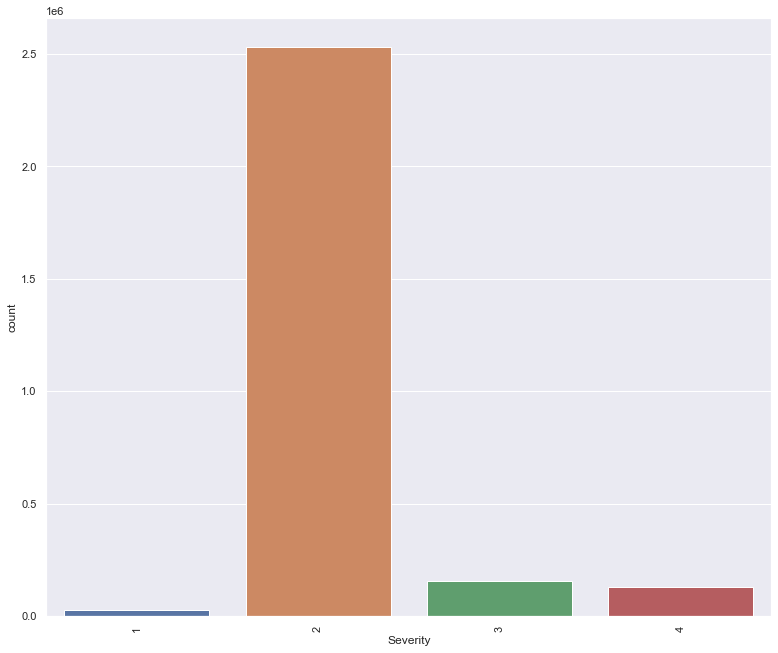

In [90]:
countplot = sns.countplot(x=df["Severity"])
countplot.set_xticklabels(countplot.get_xticklabels(),rotation=90)

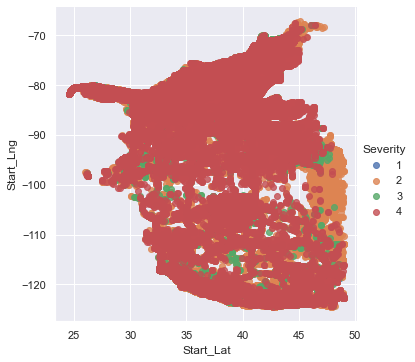

In [42]:
# Check if all the coordinates accident happen at the same locations
sns.lmplot(data=df, x='Start_Lat', y='Start_Lng', hue='Severity', fit_reg=False)
plt.show()

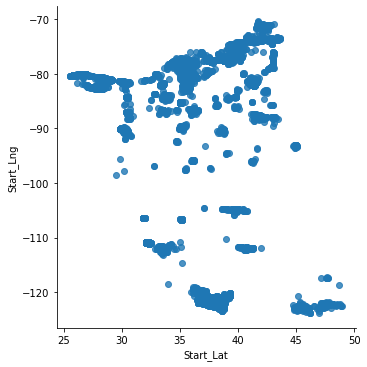

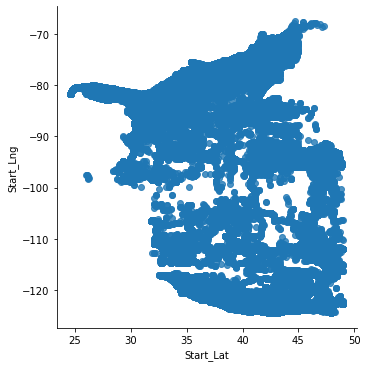

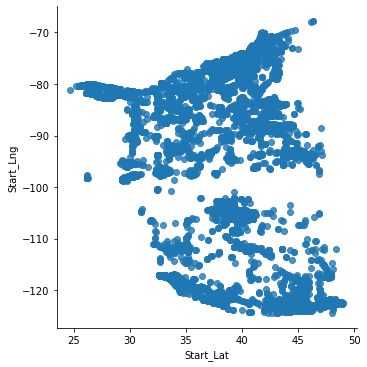

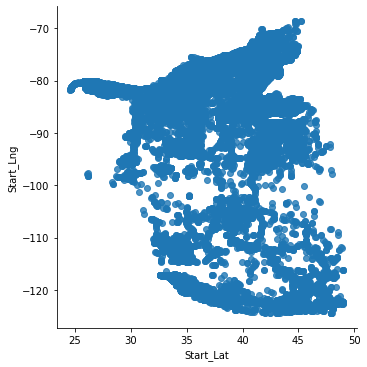

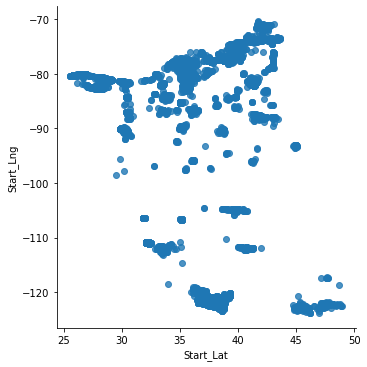

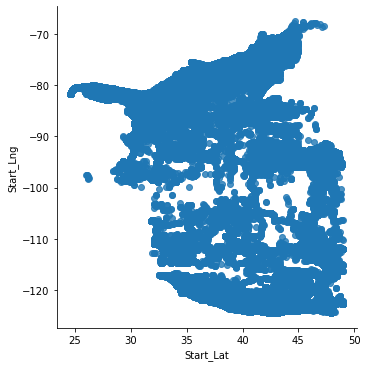

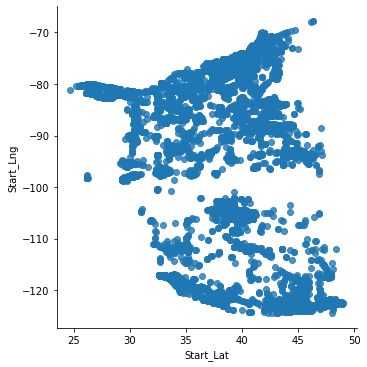

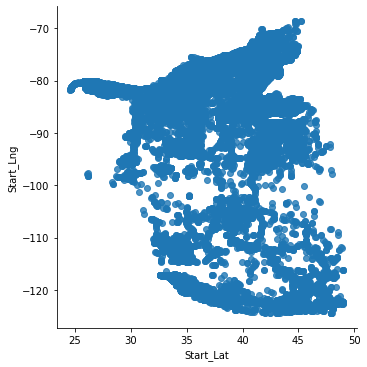

In [32]:
# Chart the plot seperately:
for i in range(1,5):
    sns.lmplot(data=df[(df['Severity']==i)], x='Start_Lat', y='Start_Lng', fit_reg=False, legend=True)

plt.show()

- Severity level 2 is the most
- Severity level 1 is the least

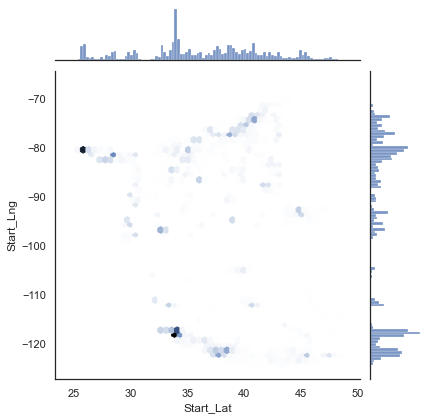

In [63]:
sns.set(style="white", color_codes=True)
sns.jointplot( x='Start_Lat', y='Start_Lng', data=df, kind='hex', marginal_kws=dict(bins=100, fill=True))

In [37]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,1.101431e+06,2.776068e+06,2.375699e+06,2.772250e+06,2.786142e+06,2.774796e+06,2.687398e+06,2.295884e+06
mean,2.137572e+00,3.624520e+01,-9.711463e+01,3.624532e+01,-9.711439e+01,7.026779e-01,8.089408e+03,6.179356e+01,5.965823e+01,6.436545e+01,2.947234e+01,9.099391e+00,7.395044e+00,7.016940e-03
std,4.787216e-01,5.363797e+00,1.831782e+01,5.363873e+00,1.831763e+01,1.560361e+00,1.836009e+04,1.862263e+01,2.116097e+01,2.287457e+01,1.045286e+00,2.717546e+00,5.527454e+00,9.348831e-02
min,1.000000e+00,2.456603e+01,-1.245481e+02,2.456601e+01,-1.245457e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.344517e+01,-1.180331e+02,3.344628e+01,-1.180333e+02,5.200000e-02,1.270000e+03,5.000000e+01,4.600000e+01,4.800000e+01,2.931000e+01,1.000000e+01,3.500000e+00,0.000000e+00
50%,2.000000e+00,3.609861e+01,-9.241808e+01,3.609799e+01,-9.241772e+01,2.440000e-01,4.007000e+03,6.400000e+01,6.300000e+01,6.700000e+01,2.982000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.016024e+01,-8.037243e+01,4.016105e+01,-8.037338e+01,7.640000e-01,9.567000e+03,7.600000e+01,7.600000e+01,8.300000e+01,3.001000e+01,1.000000e+01,1.000000e+01,0.000000e+00
max,4.000000e+00,4.900058e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,1.551860e+02,9.999997e+06,1.960000e+02,1.960000e+02,1.000000e+02,5.890000e+01,1.400000e+02,1.087000e+03,2.400000e+01


In [57]:
# Most accident start and stop at the same place so the  include of End_Lat and End_Lng is not important
# Number is address, and show no indicates so, I will not includes Number
numbers = df[["Severity","Start_Lat","Start_Lng","Distance(mi)","Temperature(F)","Wind_Chill(F)","Humidity(%)","Pressure(in)","Visibility(mi)","Wind_Speed(mph)","Precipitation(in)"]]

In [59]:
numbers

,Severity,Start_Lat,Start_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
0,3,40.108910,-83.092860,3.230,42.1,36.1,58.0,29.76,10.0,10.4,0.00
1,2,39.865420,-84.062800,0.747,36.9,NaN,91.0,29.68,10.0,NaN,0.02
2,2,39.102660,-84.524680,0.055,36.0,NaN,97.0,29.70,10.0,NaN,0.02
3,2,41.062130,-81.537840,0.123,39.0,NaN,55.0,29.65,10.0,NaN,NaN
4,3,39.172393,-84.492792,0.500,37.0,29.8,93.0,29.69,10.0,10.4,0.01
...,...,...,...,...,...,...,...,...,...,...,...
2845337,2,34.002480,-117.379360,0.543,86.0,86.0,40.0,28.92,10.0,13.0,0.00
2845338,2,32.766960,-117.148060,0.338,70.0,70.0,73.0,29.39,10.0,6.0,0.00
2845339,2,33.775450,-117.847790,0.561,73.0,73.0,64.0,29.74,10.0,10.0,0.00
2845340,2,33.992460,-118.403020,0.772,71.0,71.0,81.0,29.62,10.0,8.0,0.00


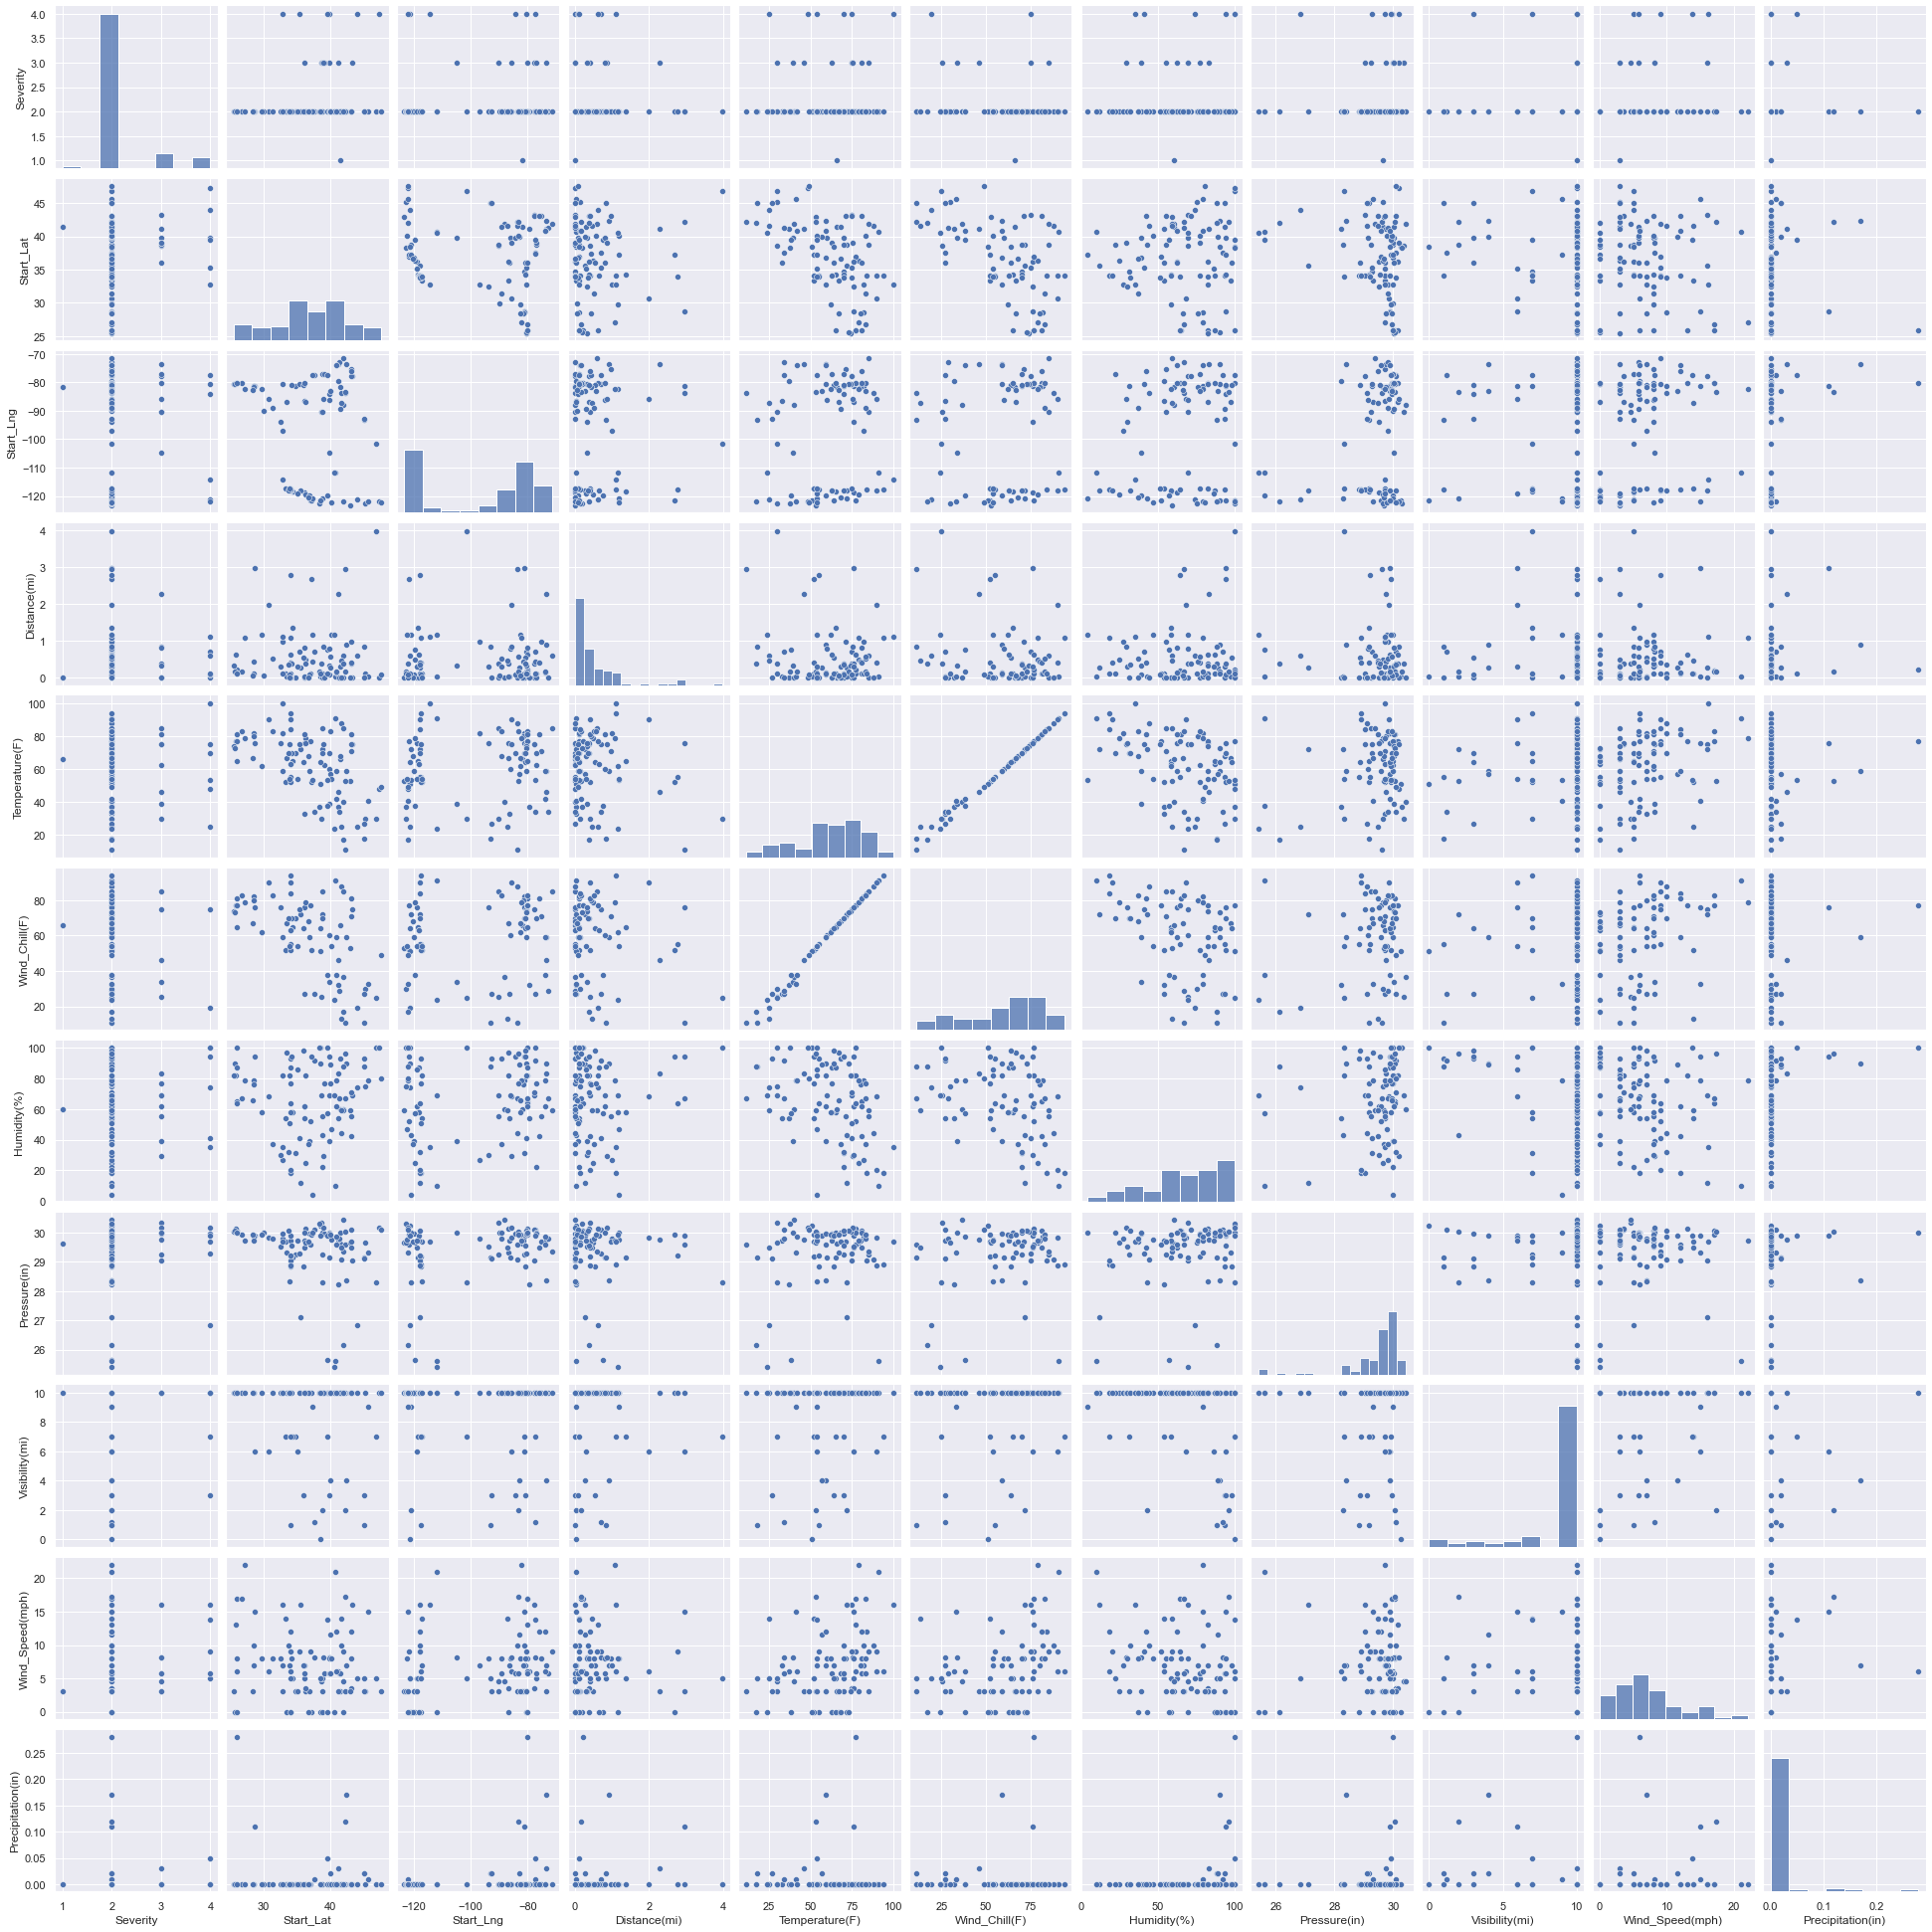

In [58]:
# We sample a small amount because trying to plot all 2845342 rows is too much.
small_sample = numbers.sample(n=100)
sns.pairplot(small_sample)

Result:
- Wind Child and Temperature look highly cooraleted so I will only choose 1

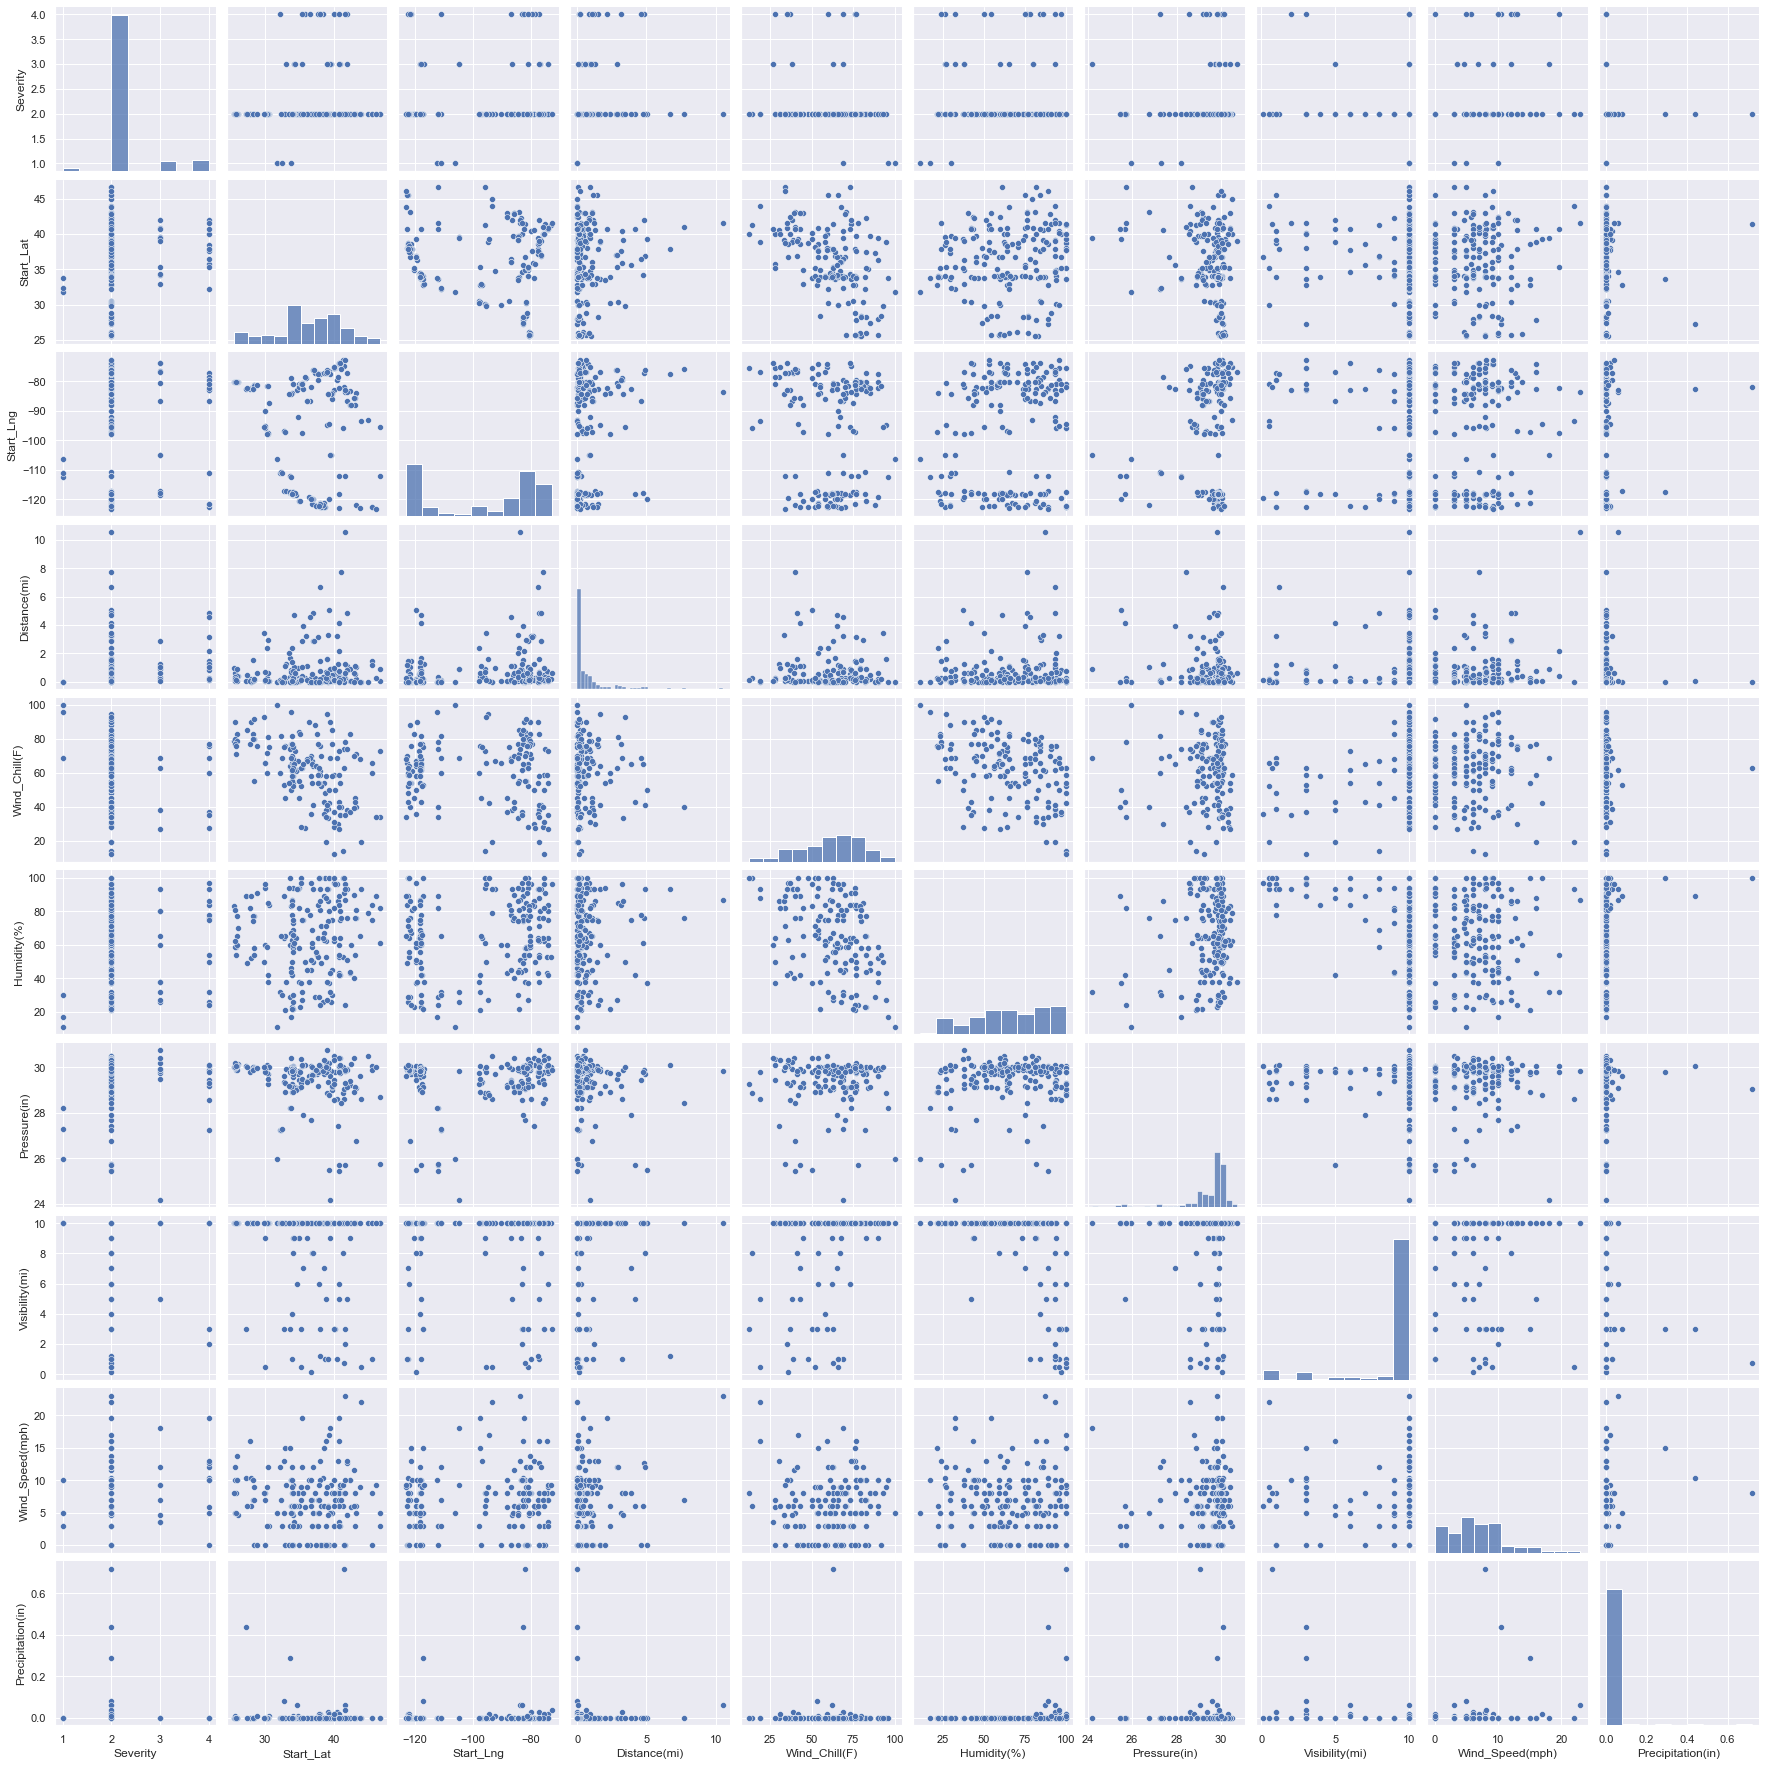

In [60]:
# Validate again
sns.pairplot(df[["Severity","Start_Lat","Start_Lng","Wind_Chill(F)","Humidity(%)","Pressure(in)","Visibility(mi)","Wind_Speed(mph)","Precipitation(in)"]].sample(n=200))

## Preprocessing

### Drop unecessary column
Drop some columns that is not useful

In [61]:
# Check for column name
# See in Kaggle.com and quick analyst some column that will not be useful such as
# ID: no need
# 
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [ ]:
df = df.drop(['ID','End_Time', 'Description', 'Number', 'End_Lat', 'End_Lng','Temperature(F)', 'City', 'County', 'State', 'Zipcode', 'Airport_Code', 'Country','Amenity',
              'Precipitation(in)','Bump','Give_Way','No_Exit','Roundabout', 'Timezone', 'Traffic_Calming', 'Turning_Loop', 'Weather_Timestamp'], axis=1)

In [70]:
df.shape

(2845342, 24)

In [67]:
df.head()

,Severity,Start_Time,Start_Lat,Start_Lng,Distance(mi),Street,Side,Wind_Chill(F),Humidity(%),Pressure(in),...,Crossing,Junction,Railway,Station,Stop,Traffic_Signal,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,3,2016-02-08 00:37:08,40.108910,-83.092860,3.230,Outerbelt E,R,36.1,58.0,29.76,...,False,False,False,False,False,False,Night,Night,Night,Night
1,2,2016-02-08 05:56:20,39.865420,-84.062800,0.747,I-70 E,R,NaN,91.0,29.68,...,False,False,False,False,False,False,Night,Night,Night,Night
2,2,2016-02-08 06:15:39,39.102660,-84.524680,0.055,I-75 S,R,NaN,97.0,29.70,...,False,True,False,False,False,False,Night,Night,Night,Day
3,2,2016-02-08 06:51:45,41.062130,-81.537840,0.123,I-77 N,R,NaN,55.0,29.65,...,False,False,False,False,False,False,Night,Night,Day,Day
4,3,2016-02-08 07:53:43,39.172393,-84.492792,0.500,I-75 S,R,29.8,93.0,29.69,...,False,False,False,False,False,False,Day,Day,Day,Day


### Convert the Street to Highway
- Convert the Street columns to string 
- Then decide which one is local and which one is highway

In [93]:
df['High_Way'] = df['High_Way'].apply(lambda x: str(x))
df['High_Way'] = df['High_Way'].apply(lambda x: True if x.find('-') else False)
#df = df.rename(columns = {"Street":"High_Way"})

[Text(0, 0, 'False')]

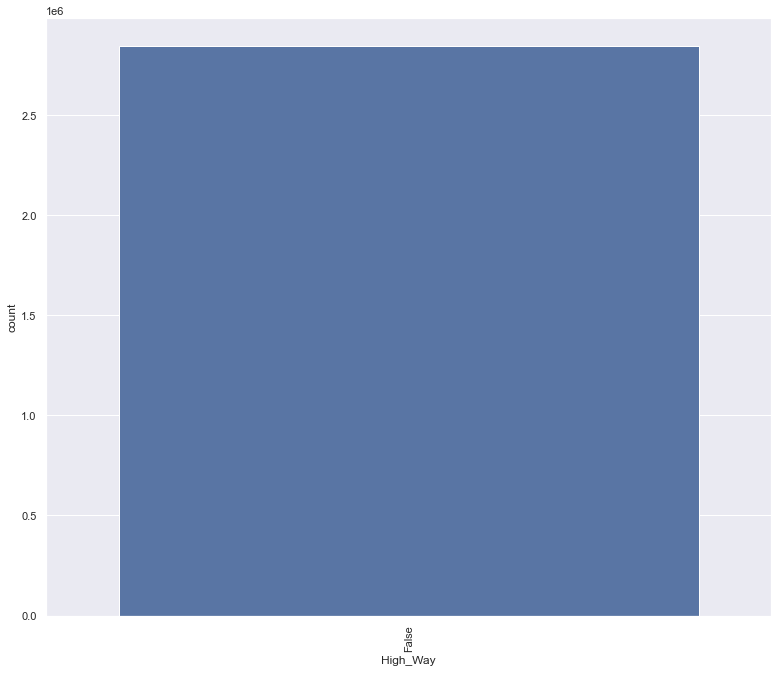

In [91]:
countplot = sns.countplot(x=df["High_Way"])
countplot.set_xticklabels(countplot.get_xticklabels(),rotation=90)

## Validate all the missing value and eliminate them to prevent biased

### Check the 4 column Astronomical_Twilight, Sunrise_Sunset, Civil_Twilight, and nautical_Twilight

Make sure the data is na accross the columns

Result: 
- After validation and subset of light NA. The result return same accross the 4 column Astronomical_Twilight, Sunrise_Sunset, Civil_Twilight, and nautical_Twilight.
- Thus, remove the na rows from these columns

In [24]:
na_df = pd.DataFrame(df[df['Astronomical_Twilight'].isna()])
print(na_df.shape)
print(na_df['Astronomical_Twilight'].isna().sum() == na_df['Sunrise_Sunset'].isna().sum())
print(na_df['Astronomical_Twilight'].isna().sum() == na_df['Civil_Twilight'].isna().sum())
print(na_df['Astronomical_Twilight'].isna().sum() == na_df['Nautical_Twilight'].isna().sum())      

(2867, 47)
True
True
True


In [89]:
df.head()

,Severity,Start_Time,Start_Lat,Start_Lng,Distance(mi),High_Way,Side,Wind_Chill(F),Humidity(%),Pressure(in),...,Crossing,Junction,Railway,Station,Stop,Traffic_Signal,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,3,2016-02-08 00:37:08,40.108910,-83.092860,3.230,False,R,36.1,58.0,29.76,...,False,False,False,False,False,False,Night,Night,Night,Night
1,2,2016-02-08 05:56:20,39.865420,-84.062800,0.747,False,R,NaN,91.0,29.68,...,False,False,False,False,False,False,Night,Night,Night,Night
2,2,2016-02-08 06:15:39,39.102660,-84.524680,0.055,False,R,NaN,97.0,29.70,...,False,True,False,False,False,False,Night,Night,Night,Day
3,2,2016-02-08 06:51:45,41.062130,-81.537840,0.123,False,R,NaN,55.0,29.65,...,False,False,False,False,False,False,Night,Night,Day,Day
4,3,2016-02-08 07:53:43,39.172393,-84.492792,0.500,False,R,29.8,93.0,29.69,...,False,False,False,False,False,False,Day,Day,Day,Day


<AxesSubplot:>

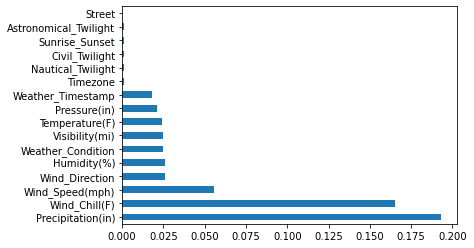

In [29]:
missing_percentage = df.isna().sum().sort_values(ascending=False)/len(df)
missing_percentage[missing_percentage!=0].plot(kind='barh')

In [30]:
# dropping the rows having NaN values
df = df.dropna()
 
# To reset the indices
df = df.reset_index(drop = True)
 
# Print the dataframe
df

,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Street,Side,Timezone,Weather_Timestamp,Temperature(F),...,Crossing,Junction,Railway,Station,Stop,Traffic_Signal,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,Outerbelt E,R,US/Eastern,2016-02-08 00:53:00,42.1,...,False,False,False,False,False,False,Night,Night,Night,Night
1,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,I-75 S,R,US/Eastern,2016-02-08 07:53:00,37.0,...,False,False,False,False,False,False,Day,Day,Day,Day
2,2,2016-02-08 11:51:46,2016-02-08 17:51:46,41.375310,-81.820170,I-71 S,R,US/Eastern,2016-02-08 11:51:00,33.1,...,False,True,False,False,False,False,Day,Day,Day,Day
3,2,2016-02-08 15:16:43,2016-02-08 21:16:43,40.109310,-82.968490,Outerbelt W,R,US/Eastern,2016-02-08 15:12:00,32.0,...,False,False,False,False,False,False,Day,Day,Day,Day
4,2,2016-02-08 15:43:50,2016-02-08 21:43:50,39.192880,-84.477230,I-75 N,R,US/Eastern,2016-02-08 15:47:00,33.8,...,False,False,False,False,False,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2207320,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.002480,-117.379360,Pomona Fwy E,R,US/Pacific,2019-08-23 17:53:00,86.0,...,False,False,False,False,False,False,Day,Day,Day,Day
2207321,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.766960,-117.148060,I-8 W,R,US/Pacific,2019-08-23 18:53:00,70.0,...,False,False,False,False,False,False,Day,Day,Day,Day
2207322,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.775450,-117.847790,Garden Grove Fwy,R,US/Pacific,2019-08-23 18:53:00,73.0,...,False,True,False,False,False,False,Day,Day,Day,Day
2207323,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.992460,-118.403020,San Diego Fwy S,R,US/Pacific,2019-08-23 18:51:00,71.0,...,False,False,False,False,False,False,Day,Day,Day,Day


In [31]:
df.shape

(2207325, 28)

## Preprocessing

1. Remove meaningless features (e.g. IDs), or unfair features (e.g. percent grade should be removed if predicing final grade)
2. Discretization
3. Transform features into usable formats (standardize dates, vectorize words)
4. Transform data to a wide format (one row per prediction)
5. **Feature Selection**: Remove redundant, noisy features or unhelpful features
6. Feature creation
    * Use an external tool (e.g. analyzing sentiment from text)
7. Revist EDA using processed features